In [ ]:
# python3 -m venv venv
# .\venv\Scripts\activate
# code .\gradients.ipynb

In [ ]:
# !pip install tensorflow
# !pip install matplotlib


In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np


Say we have a function that we want to minimize

In [2]:
def test_function(x):
    return x**2 - 6 * x + 5

We'd like to be able to get quickly to the x=3

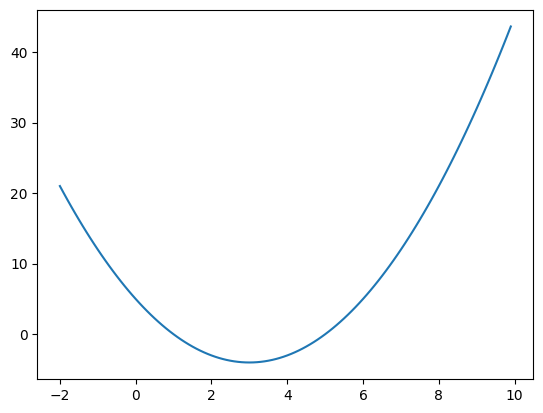

In [3]:
xs = [ x / 10.0 for x in range(-20, 100)]
ys = list(map(test_function, xs))

plt.plot(xs, ys)
plt.show()

So we can use TensorFlow's inbuilt gradient descent.

We'll start at x=0 and take small steps in the direction where the function decreases.

- This is obviously sensitive to how far we step, and we may step too far and never get closer.
 - We may also just find a local minimum as we aren't looking at the global view of the surface.

In [4]:
path = []
alpha = 0.1

x = tf.Variable(0.0)

for _ in range(10):
  
  with tf.GradientTape() as tape:
    y = test_function(x)

  dy_dx = tape.gradient(y, x)
  x.assign_sub(alpha * dy_dx)

  path.append(x.numpy())
  
print(x)
print(x.numpy())

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=2.6778774>
2.6778774


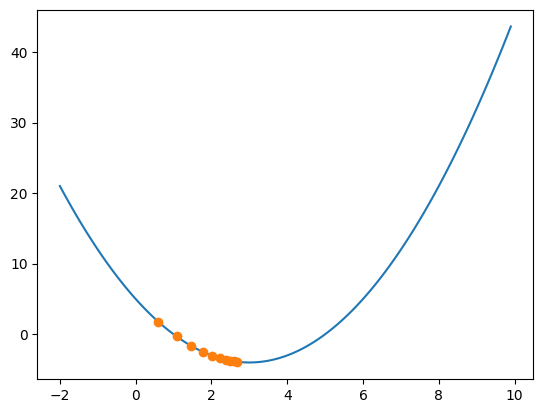

In [8]:
plt.plot(xs, ys)
plt.plot(path, list(map(test_function, path)), "o")
plt.show()

And we can use this technique in higher dimensions

In [5]:
def test_function2(x,y):
    return (x - 1) ** 2 + (y - 1) ** 2 

Which looks like

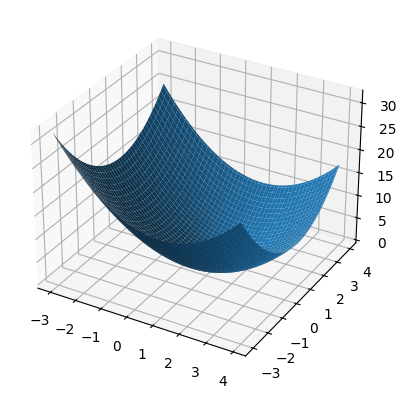

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = y = np.arange(-3.0, 4.0, 0.05)
X, Y = np.meshgrid(x, y)
zs = np.array(test_function2(np.ravel(X), np.ravel(Y)))
Z = zs.reshape(X.shape)

ax.plot_surface(X, Y, Z)

plt.show()

And it's just the same old code

In [7]:
path = []

x = tf.Variable(-3.0)
y = tf.Variable(3.0)

for _ in range(100):
  
  with tf.GradientTape() as tape:
   
    z = test_function2(x,y)

  dz_dx, dz_dy = tape.gradient(z, [x,y])
  x.assign_sub(alpha * dz_dx)
  y.assign_sub(alpha * dz_dy)

  path.append((x.numpy(),y.numpy(),z))
  
print(x.numpy(),y.numpy())
  

0.9999999 1.0000002


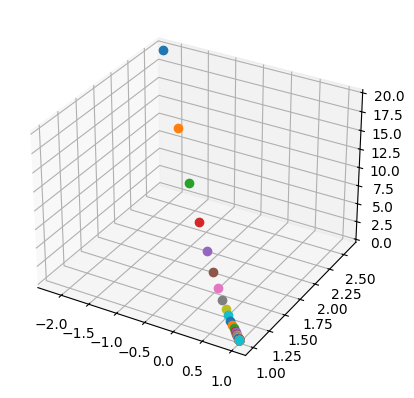

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for (x,y,z) in path:
    ax.plot(x,y,z, "o")

plt.show()

We apply the same idea to train the neural network.

Use a [layer](https://keras.io/api/layers/)

In [59]:
layer = tf.keras.layers.Dense(1, activation='relu')

for _ in range(100):
  for datum in [[1., 1.], [0., 1.], [1., 0.], [0., 0.]]:
    x = tf.constant([datum])

    with tf.GradientTape() as tape:
      y = layer(x)
      expected = datum[0] * datum[1]
      loss = (y - expected)**2

    grad = tape.gradient(loss, layer.trainable_variables)

    for var in zip(layer.trainable_variables, grad):
      var[0].assign_sub(var[1] * 0.1)

print (layer(tf.constant([[1., 1.]])))
print (layer(tf.constant([[0., 1.]])))
print (layer(tf.constant([[1., 0.]])))
print (layer(tf.constant([[0., 0.]])))

tf.Tensor([[0.9957396]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.00116819]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.00190943]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)


In [46]:
print(layer.trainable_variables)

[<tf.Variable 'dense_33/kernel:0' shape=(2, 1) dtype=float32, numpy=
array([[0.99999976],
       [0.9999997 ]], dtype=float32)>, <tf.Variable 'dense_33/bias:0' shape=(1,) dtype=float32, numpy=array([-0.99999964], dtype=float32)>]
